In [4]:
import os, json

import matplotlib.pyplot as plt

import git
repo = git.Repo('.', search_parent_directories=True)
repo_path = repo.working_tree_dir

In [23]:
potential = "linear"
boundary_condition = "dirichlet"
c = -0.8

NS = [2,3,4,5,6]
cutoffs = [2,4,8,16]

cutoff = 16
N=5

all_data = []

#for N in NS:
for cutoff in cutoffs:

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    try:
        H_path = os.path.join(repo_path, r"SUSY\Wess-Zumino\Analyses\Model Checks\HamiltonianData4", boundary_condition, potential, folder, f"{potential}_{cutoff}.json")
        with open(H_path, 'r') as file:
            H_data = json.load(file)

        H_size = H_data['H_size'][0]
        num_paulis = H_data['num_paulis']
        num_qubits = H_data['num_qubits']

        all_data.append(num_qubits)
    except:
        all_data.append(None)


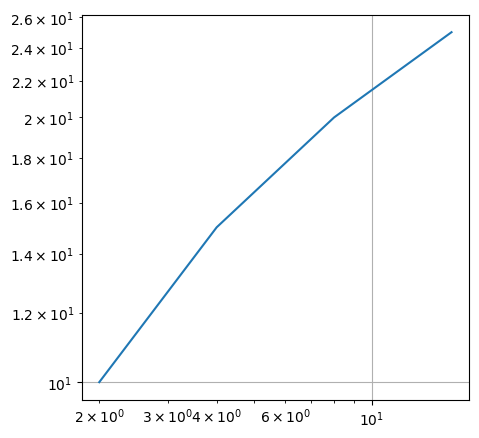

In [24]:
plt.figure(figsize=(5,5))
plt.plot(cutoffs,all_data)

plt.xticks(cutoffs)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()